# Visualização dos dados

In [2]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.gridspec import GridSpec
import scipy.stats as stats

In [3]:
incidentes = pd.read_csv("../input/training_data.csv")
teste = pd.read_csv("../input/test_data.csv")

## Características Gerais

In [4]:
incidentes.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [5]:
incidentes.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [6]:
incidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [7]:
print(incidentes.columns)
print(incidentes.shape)

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')
(5000, 13)


In [8]:
# criar um ficheiro para ver os valores de ocorrências para não ser tão repetitivo
with open("../output/occorrencies.txt", "w+") as f:
    # Iterar sobre as colunas do DataFrame
    for column in incidentes.columns:
        f.write("Column: " + str(column))
        f.write("\n")
        # Adicionar uma coluna à tabela com as contagens de valores da coluna atual
        f.write(str(incidentes[column].value_counts()))
        f.write("\n")
        f.write("-"*50)
        f.write("\n")

## Exploração de Dados

In [9]:
sns.set_theme(palette="pastel")

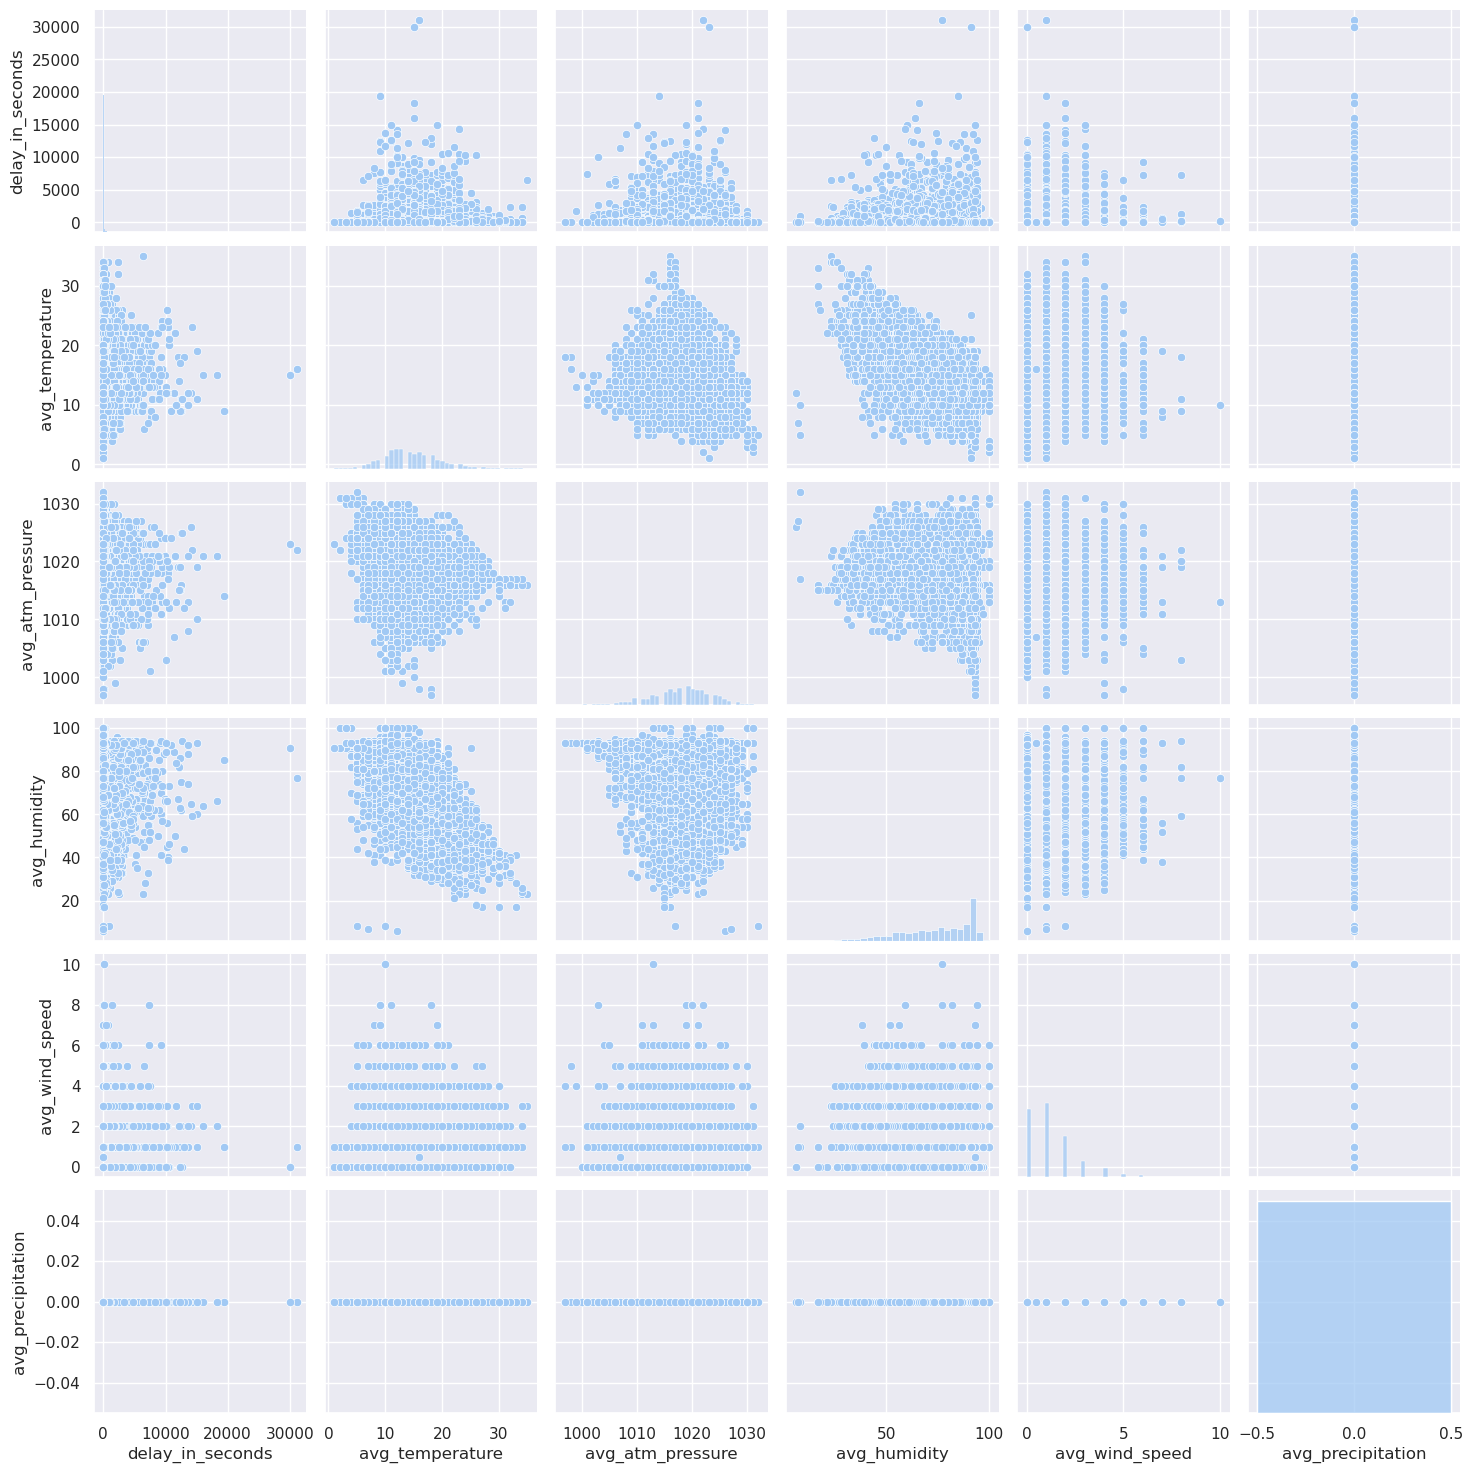

In [10]:
sns.pairplot(incidentes)

<AxesSubplot: xlabel='incidents', ylabel='Count'>

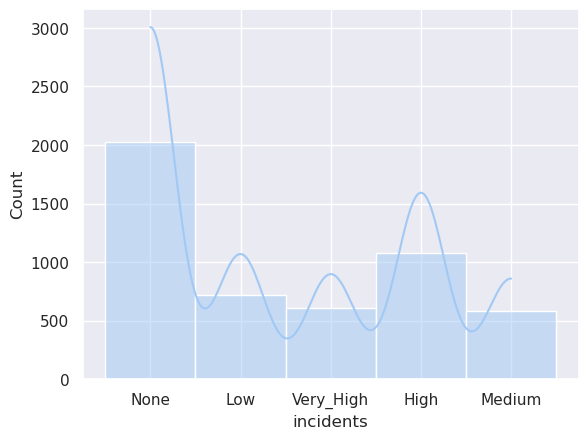

In [11]:
sns.histplot(incidentes['incidents'],kde=True)

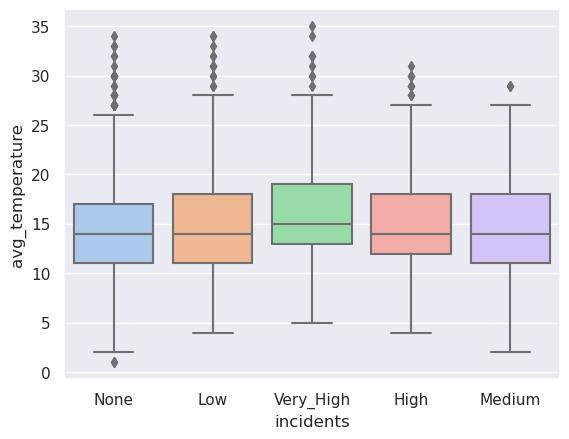

In [12]:
ax = sns.boxplot(x=incidentes["incidents"], y=incidentes["avg_temperature"])

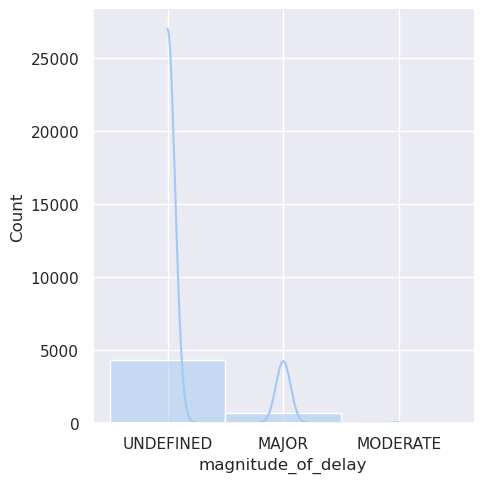

In [13]:
sns.displot(data=incidentes, x="magnitude_of_delay", kde=True)

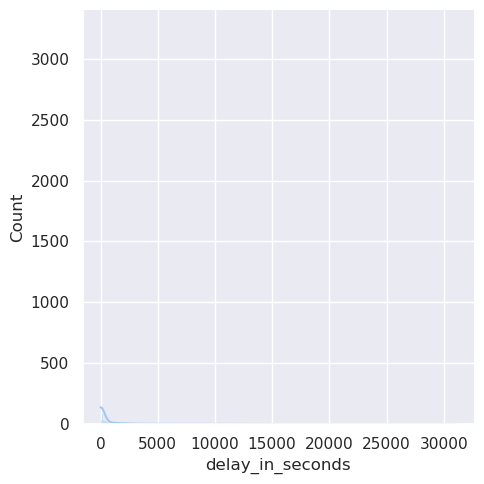

In [14]:
sns.displot(data=incidentes, x="delay_in_seconds", kde=True)

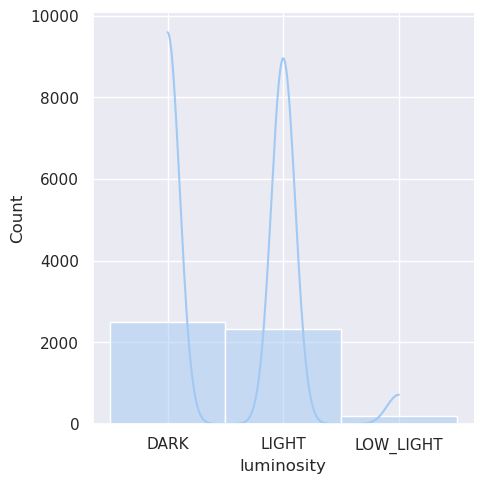

In [15]:
sns.displot(data=incidentes, x="luminosity", kde=True)

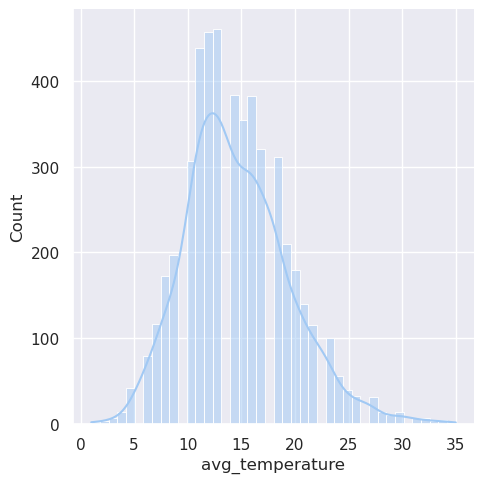

In [16]:
sns.displot(data=incidentes, x="avg_temperature", kde=True)

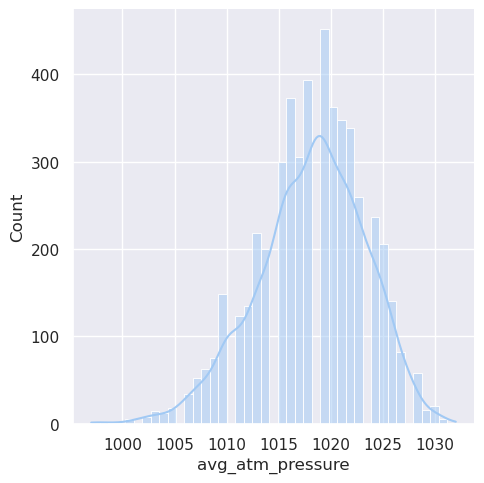

In [17]:
sns.displot(data=incidentes, x="avg_atm_pressure", kde=True)

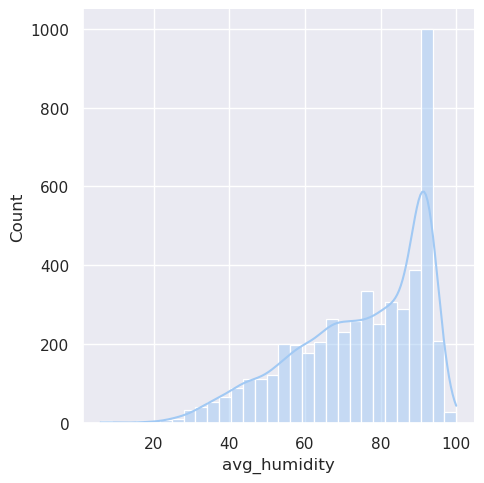

In [18]:
sns.displot(data=incidentes, x="avg_humidity", kde=True)

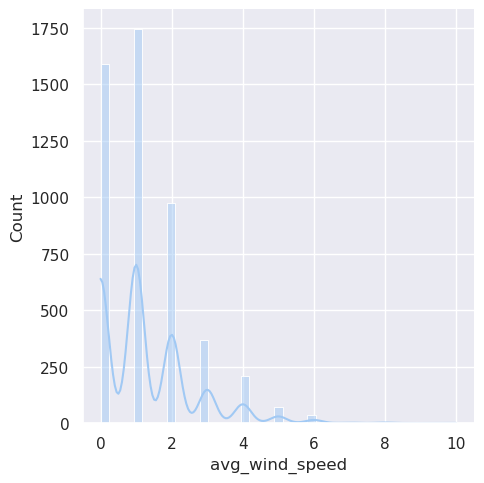

In [19]:
sns.displot(data=incidentes, x="avg_wind_speed", kde=True)

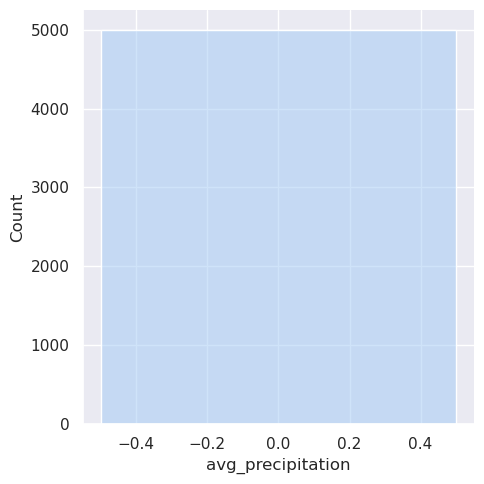

In [20]:
sns.displot(data=incidentes, x="avg_precipitation", kde=True)

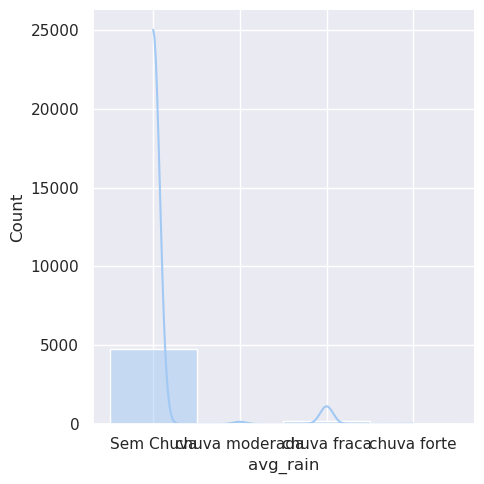

In [21]:
sns.displot(data=incidentes, x="avg_rain", kde=True)

* Duplicados, Missing Data, etc.

In [22]:
print(str(incidentes[incidentes.duplicated()])) # Verifica se e quais são os valores duplicados
print("\n")
print(str(incidentes.isna().any())) # Verifica se há valores nulos no dataset

Empty DataFrame
Columns: [city_name, magnitude_of_delay, delay_in_seconds, affected_roads, record_date, luminosity, avg_temperature, avg_atm_pressure, avg_humidity, avg_wind_speed, avg_precipitation, avg_rain, incidents]
Index: []


city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool


In [23]:
print("\n")
print(incidentes.isna().sum()) # Contagem dos valores em falta do dataset



city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64


<AxesSubplot: >

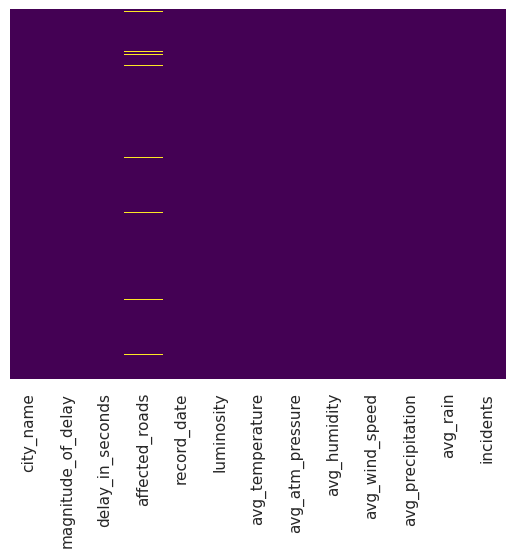

In [24]:
sns.heatmap(incidentes.isnull(), yticklabels=False, cbar=False, cmap='viridis')

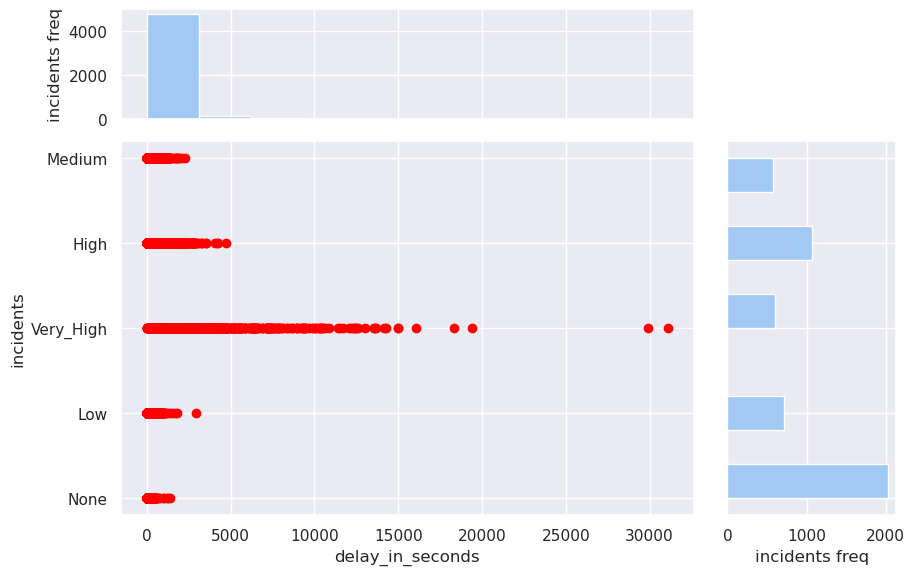

In [25]:
columns = ['delay_in_seconds', 'avg_atm_pressure','avg_temperature','avg_humidity']

fig = plt.figure(figsize=(10, 10))

gs = GridSpec(6,4)

column = columns[0]
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(incidentes[column],incidentes["incidents"], color = 'red')
ax_marg_x.hist(incidentes[column])
ax_marg_y.hist(incidentes["incidents"],orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(column)
ax_joint.set_ylabel('incidents')

# Set labels on marginals
ax_marg_y.set_xlabel('incidents freq')
ax_marg_x.set_ylabel('incidents freq')
plt.show()

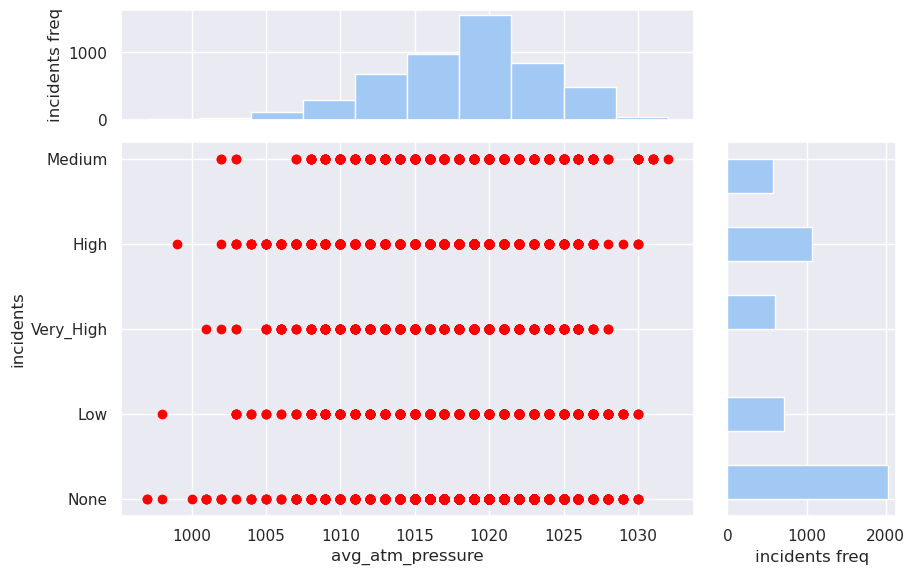

In [26]:
fig = plt.figure(figsize=(10, 10))

gs = GridSpec(6,4)

column = columns[1]
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(incidentes[column],incidentes["incidents"], color = 'red')
ax_marg_x.hist(incidentes[column])
ax_marg_y.hist(incidentes["incidents"],orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(column)
ax_joint.set_ylabel('incidents')

# Set labels on marginals
ax_marg_y.set_xlabel('incidents freq')
ax_marg_x.set_ylabel('incidents freq')
plt.show()

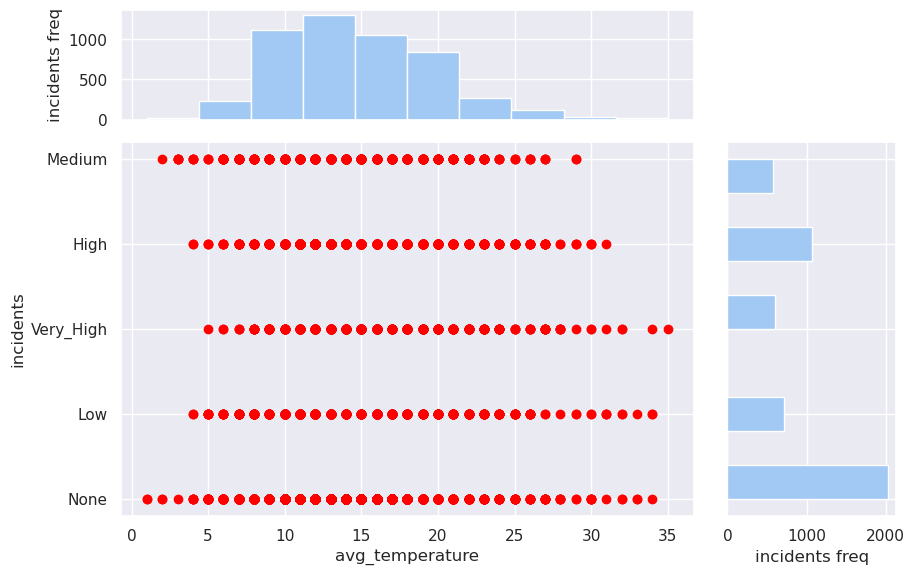

In [27]:
fig = plt.figure(figsize=(10, 10))

gs = GridSpec(6,4)

column = columns[2]
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(incidentes[column],incidentes["incidents"], color = 'red')
ax_marg_x.hist(incidentes[column])
ax_marg_y.hist(incidentes["incidents"],orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(column)
ax_joint.set_ylabel('incidents')

# Set labels on marginals
ax_marg_y.set_xlabel('incidents freq')
ax_marg_x.set_ylabel('incidents freq')
plt.show()

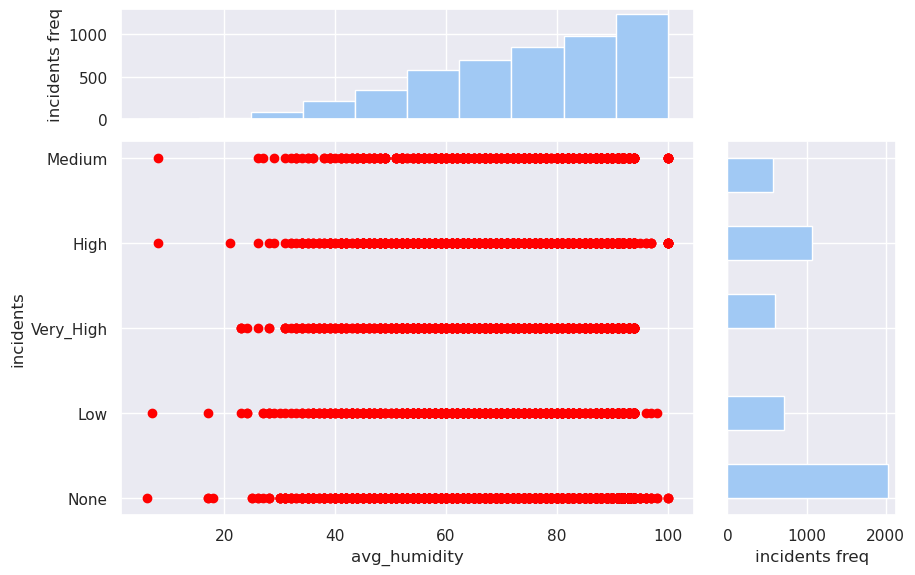

In [28]:
fig = plt.figure(figsize=(10, 10))

gs = GridSpec(6,4)

column = columns[3]
ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(incidentes[column],incidentes["incidents"], color = 'red')
ax_marg_x.hist(incidentes[column])
ax_marg_y.hist(incidentes["incidents"],orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(column)
ax_joint.set_ylabel('incidents')

# Set labels on marginals
ax_marg_y.set_xlabel('incidents freq')
ax_marg_x.set_ylabel('incidents freq')
plt.show()

* Os gráficos seguintes são ótimos na identificaçãode outliers

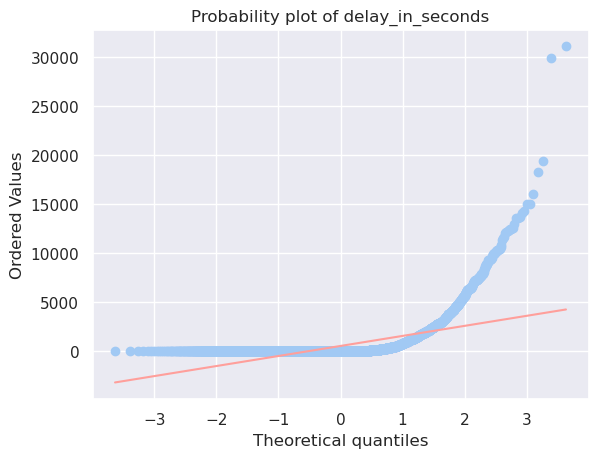

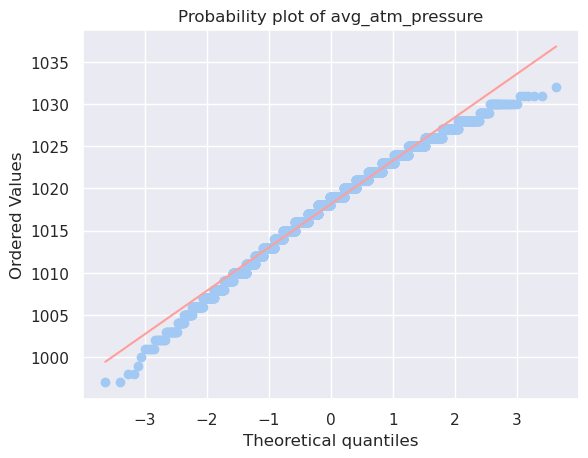

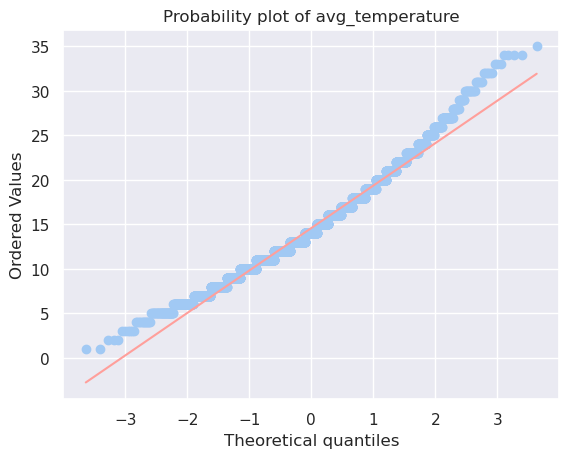

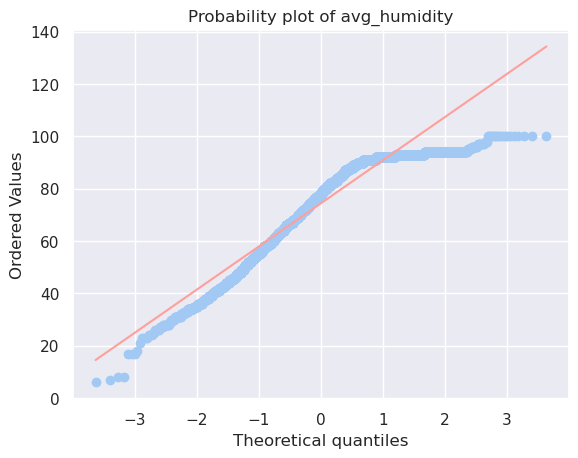

In [29]:
def plot_probplots(columns, df):
    for column in columns:
        plt.figure()
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f"Probability plot of {column}")
    plt.show()

plot_probplots(columns,incidentes)

<AxesSubplot: >

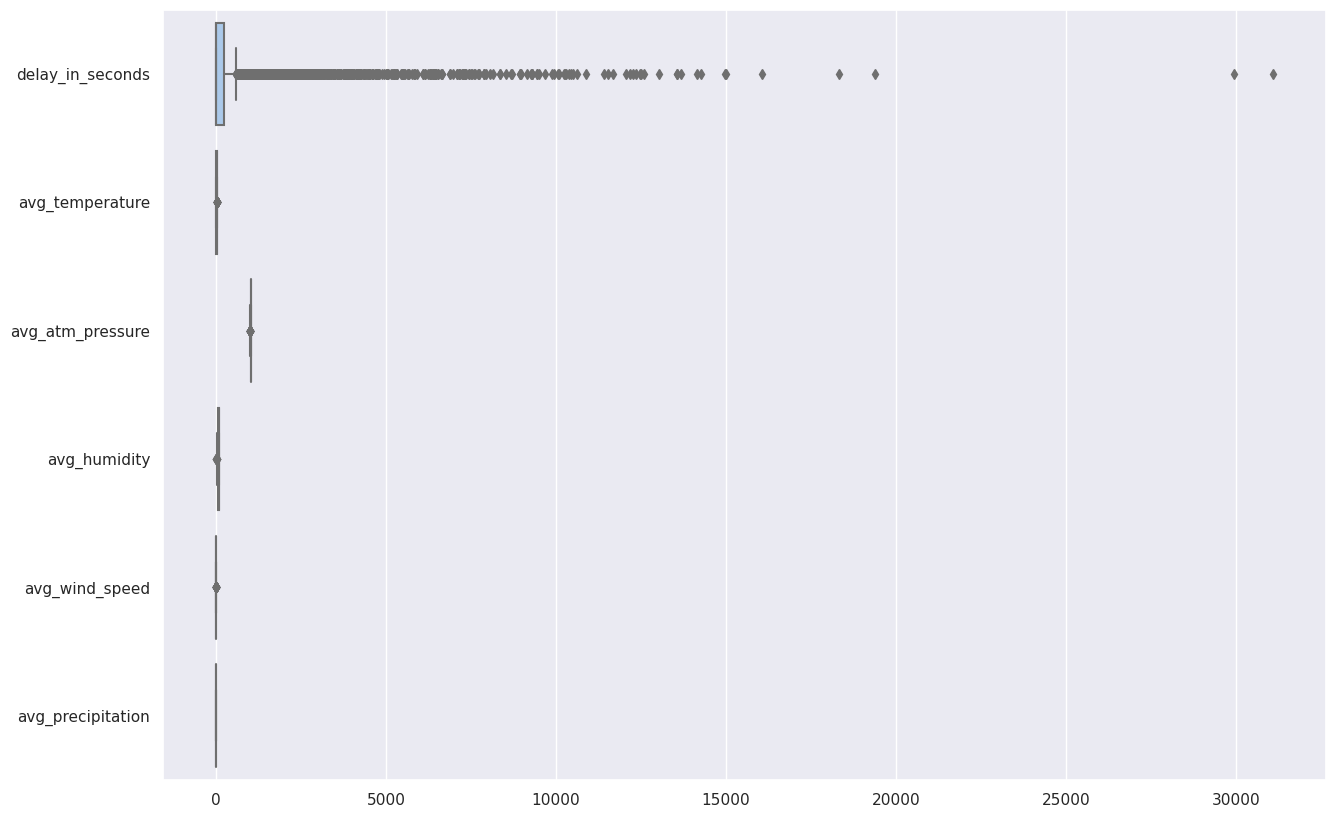

In [31]:
plt.figure(figsize= (15,10))
sns.boxplot(data=incidentes,orient ="h")

<AxesSubplot: >

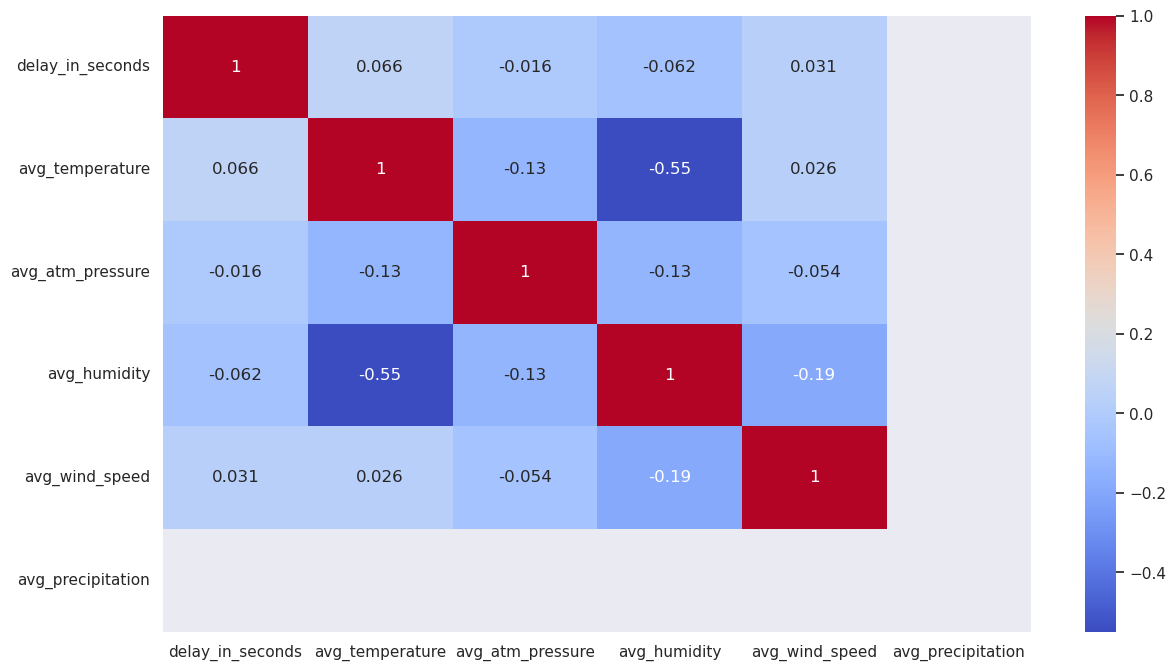

In [30]:
plt.subplots(figsize=(14,8))
sns.heatmap(incidentes.corr(), annot = True, cmap='coolwarm')

Vamos, então, prosseguir para o tratamento.

Seguir para o Notebook 1.